In [74]:
import pickle
import matplotlib.pyplot as plt

In [75]:
def get_plot(corr_index, path):
    title = ["0.00", "0.25", "0.50", "0.75"]
    alpha_values = [[1.0, 0.5, 0.5, 0.5], [0.5, 1.0, 0.5, 0.5], [0.5, 0.5, 1.0, 0.5], [0.5, 0.5, 0.5, 1.0]]
    style_values = [["b-", "g--", "r--", "c--"], ["b--", "g-", "r--", "c--"],["b--", "g--", "r-", "c--"], ["b--", "g--", "r--", "c-"]]
    alpha = alpha_values[corr_index]
    style = style_values[corr_index]
    
    with open(path+'mixed_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    mixed_ST = loaded_data["ST_LOSS"][corr_index]
    mixed_IC = loaded_data["IC_LOSS"][corr_index]
    
    with open(path+'c00_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c00_ST = loaded_data["ST_LOSS"][corr_index]
    c00_IC = loaded_data["IC_LOSS"][corr_index]

    with open(path+'c25_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c25_ST = loaded_data["ST_LOSS"][corr_index]
    c25_IC = loaded_data["IC_LOSS"][corr_index]

    with open(path+'c50_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    
    c50_ST = loaded_data["ST_LOSS"][corr_index]
    c50_IC = loaded_data["IC_LOSS"][corr_index]

    with open(path+'c75_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c75_ST = loaded_data["ST_LOSS"][corr_index]
    c75_IC = loaded_data["IC_LOSS"][corr_index]

    with open('./output_classical.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    DA_ST = loaded_data["ST_scores"]["DA_ST"][corr_index]
    DA_IC = loaded_data["IC_scores"]["DA_IC"][corr_index]

    TTC_ST = loaded_data["ST_scores"]["TTC_ST"][corr_index]
    TTC_IC = loaded_data["IC_scores"]["TTC_IC"][corr_index]

    RSD_ST = loaded_data["ST_scores"]["RSD_One_ST"][corr_index]
    RSD_IC = loaded_data["IC_scores"]["RSD_One_IC"][corr_index]

    RSD_TTC_ST = loaded_data["combination_ST"]["RSD_One_TTC_ST"][corr_index]
    RSD_TTC_IC = loaded_data["combination_IC"]["RSD_One_TTC_IC"][corr_index]

    RSD_DA_ST = loaded_data["combination_ST"]["RSD_One_DA_ST"][corr_index]
    RSD_DA_IC = loaded_data["combination_IC"]["RSD_One_DA_IC"][corr_index]

    TTC_DA_ST = loaded_data["combination_ST"]["TTC_DA_ST"][corr_index]
    TTC_DA_IC = loaded_data["combination_IC"]["TTC_DA_IC"][corr_index]

    f, ax = plt.subplots(1, 1, facecolor='w', figsize=(8, 8))
    ax.grid()

    ax.set_ylabel("SP-violation", fontsize=16)
    ax.set_xlabel("Stability Violation", fontsize=16)

    ax.plot(RSD_TTC_ST, RSD_TTC_IC, linewidth = 1.0, color = "k", alpha = 0.5)
    ax.plot(RSD_TTC_ST, RSD_TTC_IC, "ko", markersize = 3.0, alpha = 0.5)

    ax.plot(RSD_DA_ST, RSD_DA_IC, linewidth = 1.0, color = "k", alpha = 0.5)
    ax.plot(RSD_DA_ST, RSD_DA_IC, "ko", markersize = 3.0, alpha = 0.5)
    
    ax.plot(TTC_DA_ST, TTC_DA_IC, linewidth = 1.0, color = "k", alpha = 0.5)
    ax.plot(TTC_DA_ST, TTC_DA_IC, "ko", markersize = 3.0, alpha = 0.5)
    
    ax.plot(c00_ST, c00_IC, style[0], linewidth = 1.0, alpha = alpha[0], label = "c00")
    ax.plot(c00_ST, c00_IC, "b^", markersize = 5.0, alpha = alpha[0])

    ax.plot(c25_ST, c25_IC, style[1], linewidth = 1.0, alpha = alpha[1], label = "c25")
    ax.plot(c25_ST, c25_IC, "gx", markersize = 5.0, alpha = alpha[1])

    ax.plot(c50_ST, c50_IC, style[2], linewidth = 1.0, alpha = alpha[2], label = "c50")
    ax.plot(c50_ST, c50_IC, "r+", markersize = 5.0, alpha = alpha[2])

    ax.plot(c75_ST, c75_IC, style[3], linewidth = 1.0, alpha = alpha[3], label = "c75")
    ax.plot(c75_ST, c75_IC, "co", markersize = 5.0, alpha = alpha[3])

    ax.plot(mixed_ST, mixed_IC, linewidth = 1.0, color = "m", alpha = 1.0, label = "mixed")
    ax.plot(mixed_ST, mixed_IC, "md", markersize = 5.0, alpha = 1.0)

    ax.plot(DA_ST, DA_IC, "go", markersize = 5.0)
    ax.plot(RSD_ST, RSD_IC, "go", markersize = 5.0)
    ax.plot(TTC_ST, TTC_IC, "go", markersize = 5.0)
    
    ax.annotate("DA", xy = (DA_ST, DA_IC), xytext = (DA_ST+0.02, DA_IC+0.002), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad =0.2"))
    ax.annotate("RSD", xy = (RSD_ST, RSD_IC), xytext = (RSD_ST-0.01, RSD_IC+0.02), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad =0.2"))
    ax.annotate("TTC", xy = (TTC_ST, TTC_IC), xytext = (TTC_ST+0.02, TTC_IC+0.01), arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3, rad =0.2"))

    ax.set_xlim([-5e-3, 0.124])
    ax.set_ylim([-5e-3, 0.062])

    ax.set_title("Result when models/algorithms are tested on input preferences with correlation " + title[corr_index])
    ax.legend()

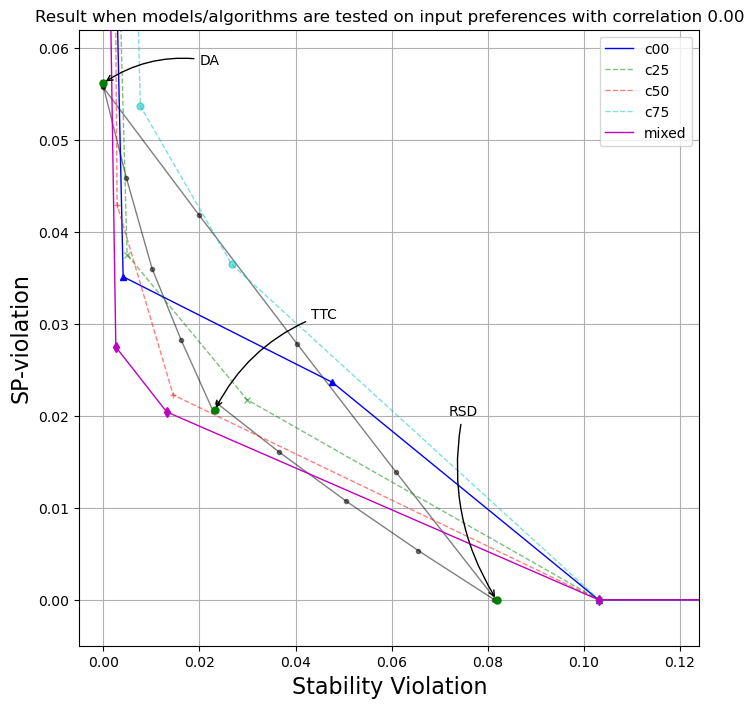

In [76]:
get_plot(corr_index = 0, path = "./models_10k/")

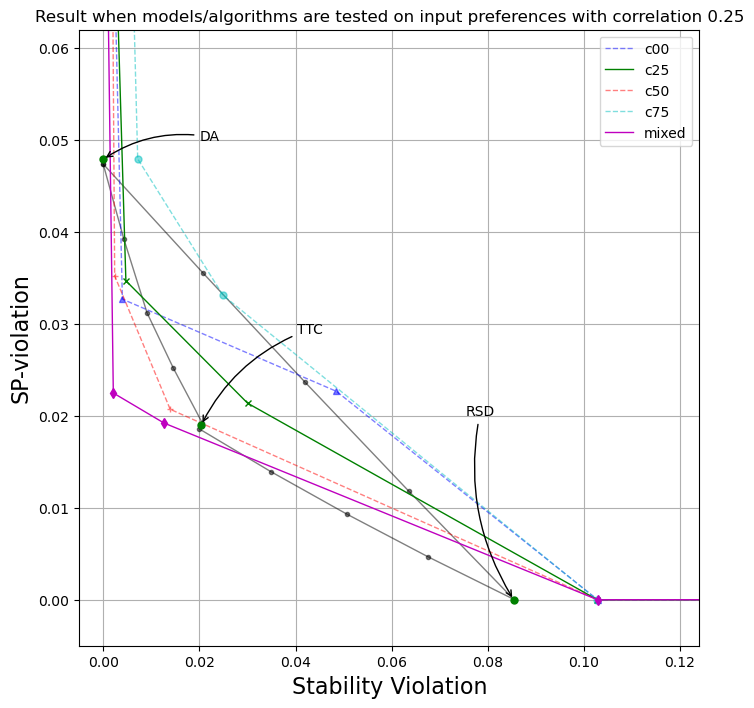

In [77]:
get_plot(corr_index = 1, path = "./models_10k/")

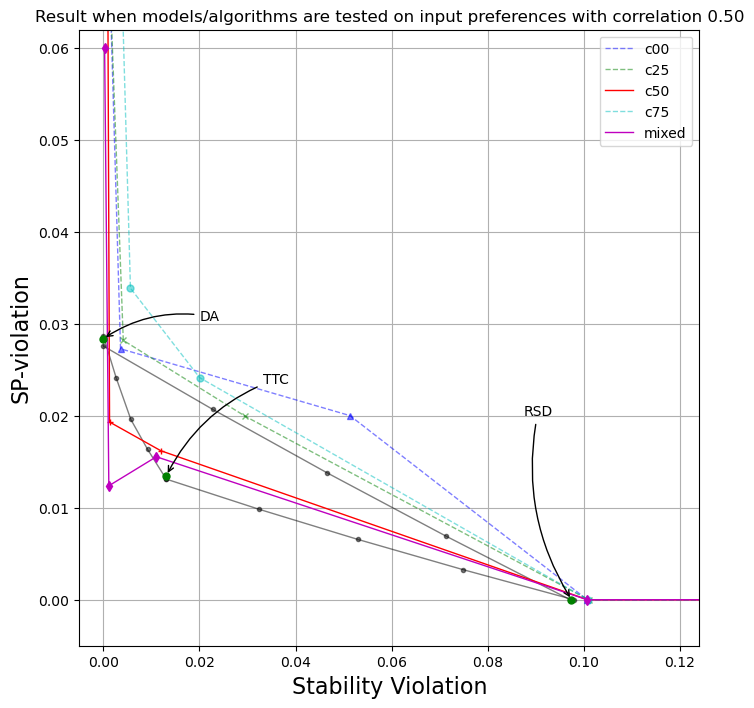

In [78]:
get_plot(corr_index = 2, path = "./models_10k/")

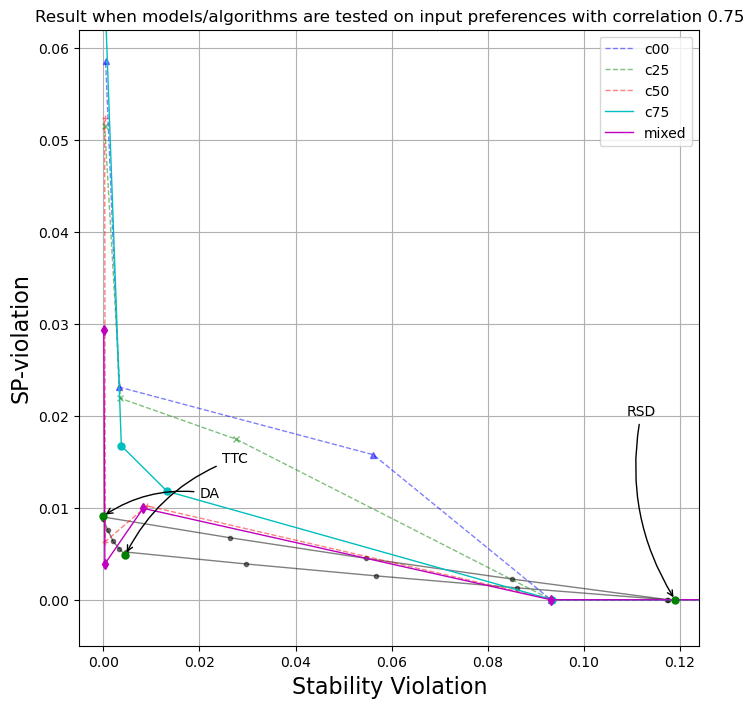

In [79]:
get_plot(corr_index = 3, path = "./models_10k/")

In [80]:
def plot_wf(corr_index, path):
    lambdas = [0.0, 0.25, 0.5, 0.75, 1.0]
    
    title = ["0.00", "0.25", "0.50", "0.75"]
    alpha_values = [[1.0, 0.5, 0.5, 0.5], [0.5, 1.0, 0.5, 0.5], [0.5, 0.5, 1.0, 0.5], [0.5, 0.5, 0.5, 1.0]]
    style_values = [["b-", "g--", "r--", "c--"], ["b--", "g-", "r--", "c--"],["b--", "g--", "r-", "c--"], ["b--", "g--", "r--", "c-"]]
    alpha = alpha_values[corr_index]
    style = style_values[corr_index]
    marker = ["^", "x", "+", "o", "d"]
    
    with open('./output_classical.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    DA_WF = loaded_data["welfare_data"]["DA_WF_corrs"][corr_index]
    TTC_WF = loaded_data["welfare_data"]["TTC_WF_corrs"][corr_index]
    RSD_WF = loaded_data["welfare_data"]["RSD_One_WF_corrs"][corr_index]
    
    with open(path+'mixed_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    mixed_WF = loaded_data["WF"][corr_index]
    
    with open(path+'c00_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c00_WF = loaded_data["WF"][corr_index]
    
    with open(path+'c25_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c25_WF = loaded_data["WF"][corr_index]
    
    with open(path+'c50_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c50_WF = loaded_data["WF"][corr_index]
    
    with open(path+'c75_results.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    c75_WF = loaded_data["WF"][corr_index]
    
    f, ax = plt.subplots(1, 1, facecolor='w', figsize=(8, 8))
    ax.grid()
    
    ax.set_xlabel("$\lambda$", fontsize=16)
    ax.set_ylabel("Welfare per agent", fontsize=16)
    
    ax.plot(lambdas, mixed_WF, lw = 1.0, label = "mixed", color = "m", marker = marker[4])
    ax.plot(lambdas, c00_WF, style[0], lw = 1.0, label = "c00", alpha=alpha[0], marker = marker[0])
    ax.plot(lambdas, c25_WF, style[1], lw = 1.0, label = "c25", alpha=alpha[1], marker = marker[1])
    ax.plot(lambdas, c50_WF, style[2], lw = 1.0, label = "c50", alpha=alpha[2], marker = marker[2])
    ax.plot(lambdas, c75_WF, style[3], lw = 1.0, label = "c75", alpha=alpha[3], marker = marker[3])
    
    
    ax.plot([0, 1], [DA_WF, DA_WF], lw = 1.0, label = "DA")
    ax.plot([0, 1], [TTC_WF, TTC_WF], lw = 1.0, label = "TTC")
    ax.plot([0, 1], [RSD_WF, RSD_WF], lw = 1.0, label = "RSD")
    
    ax.set_title("Result when models/algorithms are tested on input preferences with correlation " + title[corr_index])
    ax.legend()
   

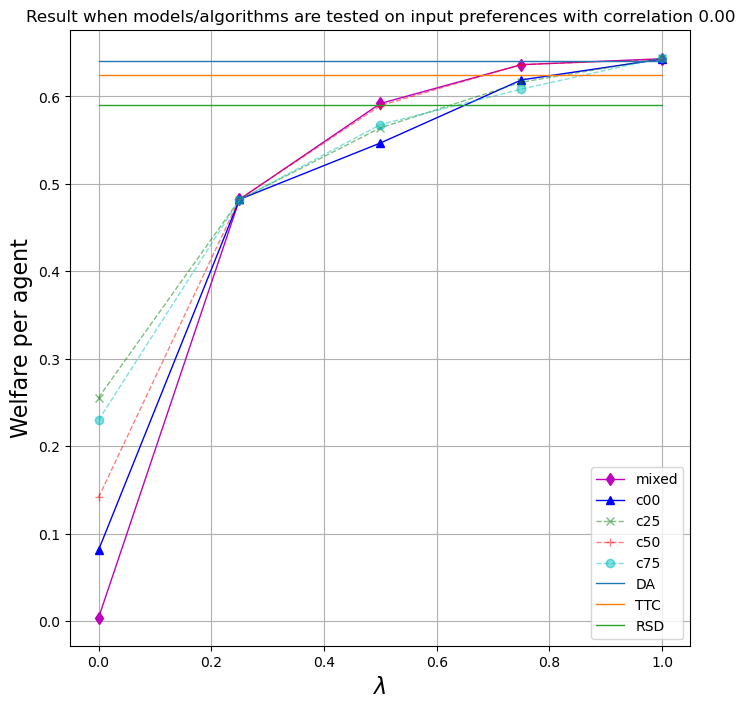

In [81]:
plot_wf(0, path = "./models_10k/")

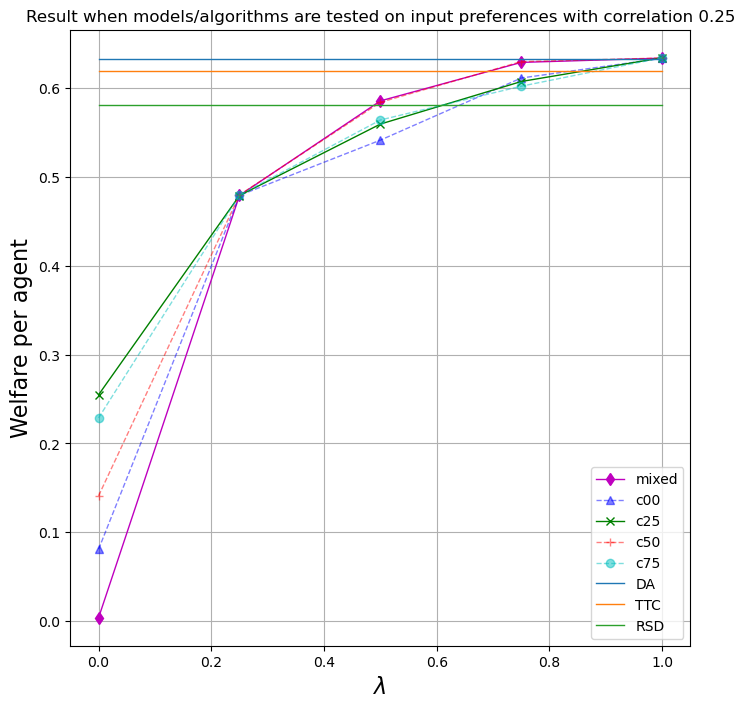

In [82]:
plot_wf(1, path = "./models_10k/")

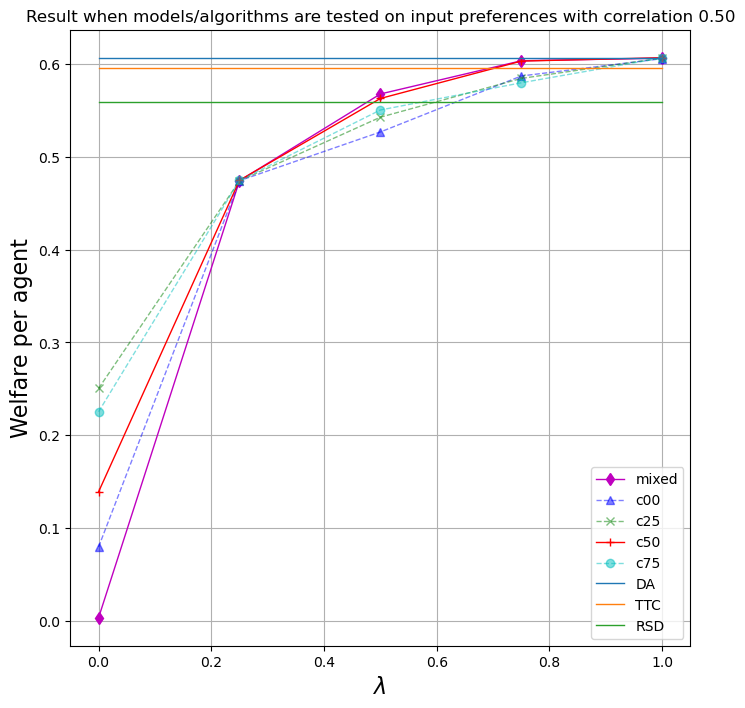

In [83]:
plot_wf(2, path = "./models_10k/")

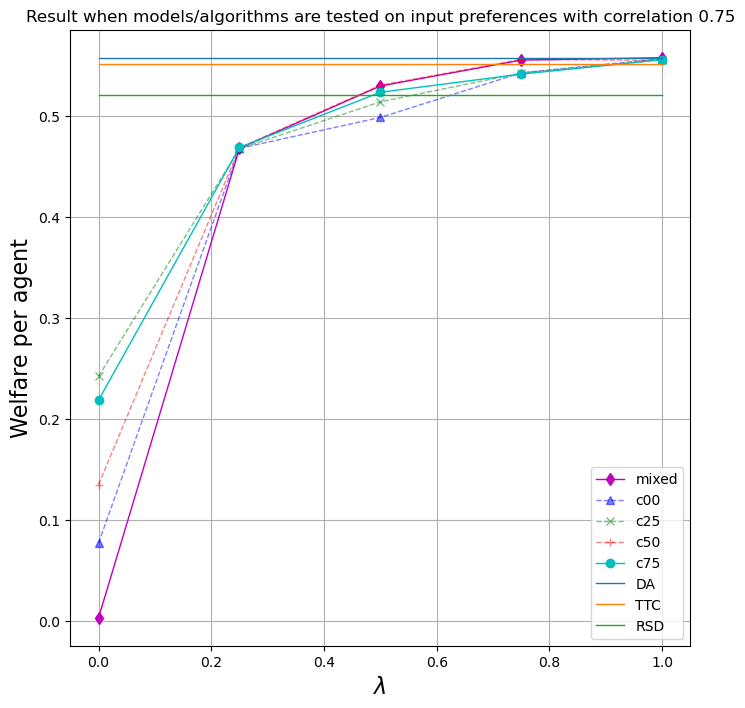

In [84]:
plot_wf(3, path = "./models_10k/")